In [1]:
# import pandas as pd
# import numpy as np
# from geopy import geocoders
# import folium

# loading pickled dataframes, making new dataframes out of them and saving them to the local drive:

In [2]:
# def pickled_df_loader (year, columns):
#     """
#     loads dataframes from the pickled dfs. 
#     """
#     df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_1")[columns]
#     df= pd.concat ([df, pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_2")[columns]]\
#                    , axis=0)
#     df= pd.concat ([df, pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_3")[columns]]\
#                    , axis=0)
    
#     df['publication_date']= df['publication_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
#     df['publication_date'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d')
    
#     return df

In [3]:
# def challenge_df_generator (begin, end):
#     """
#     loads all pickled dataframes belonging to the years in the year range and returns their concatenation as a single df. 
#     """ 
    
#     columns= ['paper_title', 'publication_date', 'place_of_distribution']
    
#     df= pickled_df_loader (begin, columns)
    
#     for year in range (begin+1, end+1):
#         df= pd.concat([df, pickled_df_loader(year, columns)], axis=0)
        
#     return df

# Analyzing the dataframe containing all the data between 1914 and 1945:

In [4]:
# newspapers_1914_1945_df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_no_article_14_45")

In [5]:
#newspapers_1914_1945_df.head()

In [6]:
#newspapers_1914_1945_df.tail()

In [7]:
#newspapers_1914_1945_df.info()

## Let's see what we can do with the lists of the cities: 

Extracting all places of distribution and storing them in a pickled python list:

In [8]:
# unique_cities=[]
# for city in newspapers_1914_1945_df['place_of_distribution']:
#     if city not in unique_cities: 
#         unique_cities.append(city)
        
# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/unique_cities.pkl", "wb") as f:
#     pickle.dump(unique_cities, f)

In [9]:
# city_list= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/unique_cities.pkl")
# city_list

Extracting names of single cities from the pickled city list: 

In [10]:
# single_city_list= []

# for place in city_list:
#     if isinstance (place, list):
#         for i in range(0, len(place)):
#             if place[i] not in single_city_list:
#                 single_city_list.append(place[i])
#     else: 
#         if place not in city_list:
#             city_list.append(place)

# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl", "wb") as f:
#     pickle.dump(single_city_list, f)

In [11]:
# cities_1914_1945= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl")
# cities_1914_1945

Pinning the cities from a city list on the world map:

In [12]:
# def map_maker(city_list):
# #plots the cities in the city list on a map.
    
#     city_dict= {}
#     gn= geocoders.GeoNames(username="golisf")
    
#     for city in city_list:
#         if not pd.isna(city):
#             city_dict[city]= gn.geocode(city)
            
#     # Create a map centered at a location, you can adjust the coordinates and zoom level as needed
#     map_center= [51.1657, 10.4515]  # Germany's approximate center
#     my_map= folium.Map(location=map_center, zoom_start=6)
 
#     # Add markers for each city
#     for city in list(city_dict.keys()):
#         folium.Marker(location=city_dict[city], popup=city).add_to(my_map)
        
#     return my_map

In [13]:
# cities_1914_1945= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl")
# map_maker(cities_1914_1945)

## Let's see what we can do with the paper titles and publication years: 

Extracting the titles of available newspapers and storing them in a pickled python list: 

In [14]:
# unique_papers=[]
# for paper in newspapers_1914_1945_df['paper_title']:
#     if paper not in unique_papers: 
#         unique_papers.append(paper)
        
# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/unique_papers.pkl", "wb") as f:
#     pickle.dump(unique_papers, f)

In [15]:
# all_papers= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/unique_papers.pkl")
# all_papers

Create a df with the following columns: 

- name of newspaper
- cities of distribution
- date begin
- date end

In [16]:
# paper_publication_df = newspapers_1914_1945_df.groupby('paper_title').agg(
#     publication_begin=('publication_date', 'min'),
#     publication_end=('publication_date', 'max'),
#     place_of_distribution=('place_of_distribution', 'first')
# ).reset_index()

# paper_publication_df.to_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")

Running the above code, I realized that the same newspaper sometimes appears multiple times in the title, each time with minor changes (eg. issues and numbers are added to the title). So I optimized the code as below. In the below code, the newspaper title is tokenized and the the first three tokens of the title are added to the df as a separate column. Then the newspapers are grouped by the first three tokens and the newspaper_title is replaced by the shortest of newspaper title that shares the first three tokens. 

Question: Could it be that the different versions of the same newspaper have been distributed in different cities? 

- Perhaps the cities should not play an important role in the challegens. 
- Perhaps I have to write a more sophisticated code that combines all distribution places of all the versions of a single newspaper into a longer list and adds this list to the final paper_publication_df. 

In [17]:
# # Function to extract first two tokens from a string
# def extract_tokens(title):
#     tokens = title.split()
#     return ' '.join(tokens[:2])

# # Apply the function to create a new column for the first three tokens
# newspapers_1914_1945_df['first_two_tokens'] = newspapers_1914_1945_df['paper_title'].apply(extract_tokens)

# # Group by the first three tokens and aggregate to get the shortest title
# paper_publication_df = newspapers_1914_1945_df.groupby('first_two_tokens').agg(
#     paper_title=('paper_title', lambda x: min(x, key=len)),
#     publication_begin=('publication_date', 'min'),
#     publication_end=('publication_date', 'max'),
#     place_of_distribution=('place_of_distribution', 'first')
# ).reset_index()

# # Drop the temporary column
# paper_publication_df.drop(columns='first_two_tokens', inplace=True)

# paper_publication_df.to_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")

Let's see which newspapers were published between which years:

In [18]:
# paper_publication_df= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")
# paper_publication_df

In [19]:
# paper_publication_df.info()

Let's see how many "Fachzeitschriften" there are among the newspapers: 

In [20]:
# fach_papers= [paper for paper in paper_publication_df['paper_title'] if 'fach' in paper.lower()]
# paper_publication_df[paper_publication_df['paper_title'].isin(fach_papers)]

Let's see for how long each newspaper has been published after 1914:

In [21]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.ticker import MultipleLocator

# fig, ax= plt.subplots(figsize=(30, 15))
# ax.set_title('Publication span of each newspaper.' ,fontsize=25)

# for i, row in paper_publication_df.iterrows():
#     bar_length= (row['publication_end'].year - row['publication_begin'].year)
    
#     if bar_length>0:
#         ax.barh(row['paper_title'][0:50], bar_length, color='g', left=row['publication_begin'].year)
#     else:
#         #the short red bars represent newspapers that were only published within a year. 
#         ax.barh(row['paper_title'][0:50], 0.1, color='r', left=row['publication_begin'].year)
    
# ax.set_xlim (1913, 1946)
# ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
# #ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5)
# plt.xticks(ticks=np.arange(1914, 1946), rotation=45)
# plt.rcParams['xtick.labelsize'] = 15


# plt.show()

**Notes:**

1. Interestingly, the publication of a considerable amount of papers seems to have stopped in 1933.
2. Despite applying the function that extracted the first three tokens from the newspaper titles, there are still instances of the same newspaper with two different titles, one shorter and one longer. More cleaning has to be done on the titles. 

# Doing PoS tagging and NER on example articles, using spaCy and network analysis using NetworkX

## spaCy:

In [22]:
import spacy
import pandas as pd
import networkx as nx

In [23]:
#df= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_1931_part_1")
#df.head()

Are there any "Fachzeitschriften" in df?

In [24]:
# fach_papers= [paper for paper in df['paper_title'] if 'fach' in paper.lower()]
# df[df['paper_title'].isin(fach_papers)]

In [25]:
# random_df=df.sample(3)
# random_df

In [26]:
# random_df.iloc[0,0]

In [27]:
# text_1= random_df.iloc[0,9]
# text_2= random_df.iloc[1,9]
# text_3= random_df.iloc[2,9]

Here is the link to the page in which the text_1 appears: https://www.deutsche-digitale-bibliothek.de/newspaper/item/B57SF7JW24X55ZNNO5AENGAPSBQLHFYC?tx_dlf[highlight_word]=Neue%2BMannheimer%2BZeitung&issuepage=8&query=Neue+Mannheimer+Zeitung&fromDay=2&fromMonth=3&fromYear=1931&toDay=2&toMonth=3&toYear=1931&hit=2

In [28]:
# #! python -m spacy download de_core_news_sm
# nlp = spacy.load("de_core_news_sm")

# doc_1 = nlp(text_1)
# sentences_1 = list(doc_1.sents)

# doc_2 = nlp(text_2)
# sentences_2 = list(doc_2.sents)

# doc_3 = nlp(text_3)
# sentences_3 = list(doc_3.sents)

PoS (Part of Speech) tagging in the first sentence: 

In [29]:
# for token in sentences_1[0]:
#     print('{}: {}'.format(token.text, token.pos_))

A function that extracts all nouns from all sentences within a given text: 

In [30]:
# def extract_nouns(text):
    
#     doc = nlp(text)
#     sentences = list(doc.sents)
#     entities=[]
    
#     for sentence in sentences:
#         sentence_entities = []
#         for token in sentence:
#             if token.pos_ == 'NOUN':
#                 sentence_entities.append(token.text)
    
#         if len(sentence_entities)>0:
#             entities.append(sentence_entities)
    
#     return entities

In [31]:
# nouns_1= extract_nouns(text_1)
# nouns_1

### Coverting noun lists into network data:

In [32]:
# def get_network_data(nouns):
#     final_sources = []
#     final_targets = []
#     for row in nouns:
#         source = row[0]
#         targets = row[1:]
#         for target in targets:
#             final_sources.append(source)
#             final_targets.append(target)
#     df = pd.DataFrame({'source':final_sources, 'target':final_targets})
#     return df

In [33]:
# network_df_1= get_network_data(nouns_1).head(40)

### Converting network data into visualized networks: 

In [34]:
# G_1 = nx.from_pandas_edgelist(network_df_1)
# nx.info(G_1)

In [35]:
# def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5, edge_length=100):
    
#     import numpy as np
#     from IPython.display import SVG
#     from sknetwork.visualization import svg_graph
#     from sknetwork.data import Bunch
#     from sknetwork.ranking import PageRank
    
# #     # Compute force-directed layout
# #     pos = nx.spring_layout(G, seed=42)
    
#     adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')
#     names = np.array(list(G.nodes()))
#     graph = Bunch()
#     graph.adjacency = adjacency
#     graph.names = np.array(names)
#     pagerank = PageRank()
#     scores = pagerank.fit_transform(adjacency)
#     if show_names:
#         image = svg_graph(graph.adjacency, font_size=font_size,
#                           node_size=node_size, names=graph.names, width=700, height=500,
#                           scores=scores, edge_width=edge_width)
#     else:
#         image = svg_graph(graph.adjacency, node_size=node_size,
#                           width=700, height=500, scores = scores, edge_width=edge_width, edge_length=edge_length)
    
#     return SVG(image)

In [36]:
# draw_graph(G_1, edge_width=0.2, node_size=3, show_names=True)

In [37]:
# nouns_2= extract_nouns(text_2)
# network_df_2= get_network_data(nouns_2).head(40)
# G_2 = nx.from_pandas_edgelist(network_df_2)
# draw_graph(G_2, edge_width=0.2, node_size=3, show_names=True)

In [38]:
# nouns_3= extract_nouns(text_3)
# network_df_3= get_network_data(nouns_3).head(40)
# G_3 = nx.from_pandas_edgelist(network_df_3)
# draw_graph(G_3, edge_width=0.2, node_size=3, show_names=True)

<font color=red>RESULT:</font> Finding nouns in the newspaper data is useless, because there are lots of them and some of them are not relevant. Except we search for certain nouns such as "Nazis" or "Nationalsozialisten".

NER (Named Entity Recognition) with spaCy in the first article: 👎🏽

In [39]:
# for ent in doc_2.ents:
#     print('{}: {}'.format(ent, ent.label_))

## NLTK

In [40]:
# import nltk
# nltk.download('punkt')

In [41]:
# from nltk.tokenize import sent_tokenize

# sentences_1 = sent_tokenize(text_1)
# sentences_1[0:5]

In [42]:
# sentence = sentences_1[3]

# from nltk.tokenize import casual_tokenize
# tokens = casual_tokenize(sentence)
# tokens

In [43]:
# nltk.download('averaged_perceptron_tagger')
# nltk.pos_tag(tokens)

In [44]:
# from string import punctuation

# def extract_entities(sentence):
#     """
#     extracts entities from single sentences.
#     """
    
#     entities = []
#     tokens = casual_tokenize(sentence)
    
#     for row in nltk.pos_tag(tokens):
#         token = row[0]
#         tag = row[1]
#         if tag == 'NNP':
#             for p in punctuation:
#                 if p in token:
#                     cutoff = token.index(p)
#                     token = token[:cutoff]
#             if len(token) > 1:
#                 entities.append(token)
            
#     if len(entities) > 0:
#         return entities
#     else:
#         return None

In [45]:
# entities = [extract_entities(sentence) for sentence in sentences_1]
# len(entities)

In [46]:
# import pandas as pd

# df = pd.DataFrame({'sentence':sentences_1, 'entities':entities})
# df.head(10)

In [47]:
# df = df.dropna()
# df = df[df['entities'].apply(len)>1]
# entities = df['entities'].to_list()
# len(entities)

In [48]:
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# def get_text_entities(text):
    
#     sentences = sent_tokenize(text)
#     entities = [extract_entities(sentence) for sentence in sentences]
#     df = pd.DataFrame({'sentence':sentences, 'entities':entities})
#     df = df.dropna()
#     df = df[df['entities'].apply(len) > 1]
#     entities = df['entities'].to_list()
    
#     german_stop_words = stopwords.words('german')
    
#     for list in entities: 
#         for item in list:
#             if item.lower() in german_stop_words:
#                 list.remove(item)
    
#     return entities

In [49]:
# get_text_entities (text_1)

In [50]:
# get_text_entities (text_2)

In [51]:
# get_text_entities (text_3)

In [52]:
# network_df_1= get_network_data(get_text_entities (text_1))
# network_df_1

In [53]:
# G_1 = nx.from_pandas_edgelist(network_df_1)
# draw_graph(G_2, edge_width=0.2, node_size=3, show_names=True)

In [54]:
# network_df_2= get_network_data(nouns_2).head(40)
# G_2 = nx.from_pandas_edgelist(network_df_2)
# draw_graph(G_2, edge_width=0.2, node_size=3, show_names=True)

In [55]:
# network_df_3= get_network_data(nouns_3).head(40)
# G_3 = nx.from_pandas_edgelist(network_df_3)
# draw_graph(G_3, edge_width=0.2, node_size=3, show_names=True)

In [64]:
#nouns_1= extract_nouns(text_1)
# nouns_2= extract_nouns(text_2)
# nouns_3= extract_nouns(text_3)

#len(nouns_1)

In [ ]:
# len(get_text_entities (text_1))
# get_text_entities (text_2)
# get_text_entities (text_3)

## RESULT: spaCy performs much better than NLTK in extracting nouns and needs less cleaning. 

# Exploring the possibility of a challenge: Looking for War!

Extracting only dataframes containing a certain list of words in their full text and saving them to pickled dataframes on the local drive again. 

The following cells load newspaper dfs and searche their full text for the word 'krieg'. If the word is in the full text in each row, the row is kept. Otherwise, it is deleted. The resulting df is saved to a pickled file. 

In [4]:
# def pickled_df_loader (year, part, columns, words):
#     """
#     loads all three dataframes from the pickled dfs for each year and concatenates them. 
#     """
#     df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_{part}")[columns]
    
# #     for index, row in df.iterrows():
# #         if not any(word in row['plainpagefulltext'].lower() for word in words):
# #             df.drop(index, inplace=True)
    
#     # Convert 'plainpagefulltext' to lowercase and check for presence of words using vectorized operations
#     # | (pipe) is a regular expression standing for "or".
#     mask = df['plainpagefulltext'].str.lower().str.contains('|'.join(words))
#     df = df[mask]
    
#     df['publication_date']= df['publication_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
#     df['publication_date'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d')
    
#     return df

In [6]:
# columns= ['paper_title', 'publication_date', 'place_of_distribution', 'plainpagefulltext', 'pagenumber']
# words=['krieg']

# for year in range(1914, 1946):
#     for part in range(1,4):
#         df= pickled_df_loader (year, part, columns, words)
#         df.to_pickle (f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_{part}_krieg")
#         print(f"task for {year} part {part} complete. length= {len(df)}")
#     print(' ')

Now let us load one of the dataframes with the word "krieg" in all of its full texts and see what a network analysis of the word would look like:

In [3]:
import pandas as pd
import spacy
import networkx as nx

In [4]:
df=pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/full_text_dfs_krieg/newspapers_ger_1914_part_1_krieg")
df.head()

,paper_title,publication_date,place_of_distribution,plainpagefulltext,pagenumber
4,Der Volksfreund : Tageszeitung für das werktät...,1914-03-04,"[Karlsruhe, Offenburg]","tio . 63 . Karlsruhe , Mittwoch den 4 * Marz 1...",1
9,Der Volksfreund : Tageszeitung für das werktät...,1914-03-04,"[Karlsruhe, Offenburg]","No . 53 . Mittwoch , den 4 . März 1914 . Veite...",6
11,Der Volksfreund : Tageszeitung für das werktät...,1914-03-04,"[Karlsruhe, Offenburg]","Nr . 53 , Mittwoch , den 4 . März 1914 . Soebe...",8
12,Bergische Wacht. 1907-1941,1914-02-25,"[Klüppelberg, Wipperfürth, Wipperfürth-Klüppel...",mit den Beilagen : Illustr . Sonntagsblatt und...,1
13,Bergische Wacht. 1907-1941,1914-02-25,"[Klüppelberg, Wipperfürth, Wipperfürth-Klüppel...","sie das Trostlose ihrer Lage eingesehen , wenn...",2


In [5]:
df['paper_title'].mode()

0    Hamburger Fremdenblatt
dtype: object

In [6]:
hamburger_df=df[df['paper_title']=='Hamburger Fremdenblatt']
hamburger_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 184 to 127179
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   paper_title            1150 non-null   object        
 1   publication_date       1150 non-null   datetime64[ns]
 2   place_of_distribution  1150 non-null   object        
 3   plainpagefulltext      1150 non-null   object        
 4   pagenumber             1150 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 53.9+ KB


The newspaper "Hamburger Fremdblatt" seems to have the highest amount of articles in this df. I want to see how this particular newspaper has been reporting about war in the first four months of 1914. 

First, let us tokenize sentences and words and filter out every instance of 'krieg':

In [10]:
nlp = spacy.load("de_core_news_sm")

In [18]:
def extract_sentences(text, word):
    """
    extracts all sentences that contain the word "krieg".
    """ 
    doc = nlp(text)
    sentences = list(doc.sents)
    sentences_with_word=[]
    
    for sentence in sentences:
        if word in str(sentence).lower():
                sentences_with_word.append(sentence)
            
    return sentences_with_word

In [12]:
text=hamburger_df.iloc[25,-2]
text

'Zweite Beilage. Hamburger Fremdenblatt. Donnerstag, 5. Februar 1914. Nr. 30. Seite 11 Huwal. San Franzlsko, 3. Februar. Der «roerikaniseho Segler Hawai kt mit Sturmschäden hier eingelaufen, uni Ml reparieren. liolnr L>. e. Helein gö r, 2. Februar. Der *nf Anhelt gestrandete dänische Dampfer Holar ist #nn li den Dampfer Kattegat flottgemacht und hier Angebracht. I »er Dampfer ist unbesehXdigt be fanden und nach Christiania weitergegangen, Jupiter D. Kingston, 3. Februar. Der 8eut nebe Dampfer Jupiter, der die Schraube verloren hat, int hier eingeschleppt worden. Kent D. Alban y (W.-A.), 2. Februar. Der Dampfer Kent ist mit Schaden am Hauptdanipfrohr hier angekommen. Die Reparaturen werden einige Tage in Anspruch nehmen. Koran« D. St. Vincent (C.-V.l. 1. Febr. Der österreii hiacho Dampfer Koran a ist mit be schädigter II oclid ruek m a s eh i nc hier angekommen, wird aber ohne zu reparieren weitergehen. Leeblte D. L nid, 2. Februar. Der Aber- Äeenor Dampfer Leobit-e ist bei Ivoeli Kribo

In [19]:
extract_sentences(text, 'krieg')

[Tapperheten Kriegsseh.,
 Es ist den vereinten Bemühungen der Kriegsschiffe Acran und Vasa sowie des Bergungs dampfers Herakles nicht gelungen, das gestrandete Panzerschiff Tappvvheten abzuschleppen, trotzdem die kleineren Geschütze, Kohlen usw. herausgenom men sind.,
 Die beiden obigen Kriegs schiffe sind zurückgezogen worden Tasealusa D. Algier, 31. Janr.]

In [20]:
sents_with_krieg = hamburger_df.iloc[:, -2].apply(lambda x: extract_sentences(x, 'krieg')).tolist()

In [45]:
sents_with_krieg[0][0]

Das Programm war der Ausführung schon stark entgegen gereift, als der Tripoliskrteg uno balo daraus der Balkankrieg ausbrachen uird die Verhand lungen hinausgeschoben werden mutzten.

Interesting! In all of the reports of this newspaper, the word "krieg" appears only in one sentence per article. 

In [78]:
def extract_nouns(sentence_list):
    entities = []
    
    for sentence in sentence_list:
        sentence_entities = []
        for token in sentence[0]:
            if token.pos_ == 'NOUN':
                sentence_entities.append(token.text)
    
        if len(sentence_entities) > 0:
            entities.append(sentence_entities)
    
    return entities

In [89]:
nouns= extract_nouns(sents_with_krieg)
nouns

[['Programm', 'Ausführung', 'Tripoliskrteg', 'Balkankrieg', 'Verhand'],
 ['Kriegsschiffe'],
 ['Bewilligung', 'AufbefferungsprogrammS', 'Kriegsmaterial', 'Kammer'],
 ['Rücksicht',
  'Ereignisse',
  'Belk',
  'Moratorien',
  'Rechte',
  'Wechlelverkehr',
  'Personen'],
 ['Kriegerverein', 'Stiftungsfest', 'Räumen'],
 ['<', 'Geld-ume', 'Geldgewinne', 'Abzug', 'Mark'],
 ['Probesttige', 'Flieger', 'Eindecker', 'Flugplatz'],
 ['September',
  'Berichtsjahre',
  'Ballonver',
  'Kommission',
  'Wanderpreis',
  'Renata'],
 ['Frühjahr',
  'Reihe',
  'Di-bacle',
  'Konzer',
  'tes',
  'Zeit',
  'Schneeschmelze',
  'Aussicht',
  'Pro',
  'Schar',
  'Nervösen',
  'Lande',
  'Kriegs'],
 ['Kriegsgericht', 'Seutiumt', 'Soldatenmißhandlung'],
 ['Einfahrt',
  'Zuges',
  'Stadtgebiet',
  'Strandbatterie',
  'Leuchtturm',
  'Geschützsalut',
  'Schüssen',
  'Schiffe',
  'Geschwaders',
  'Kriegsschiffe',
  'Flaggengala',
  'Schüffen'],
 ['Beteiligung',
  'Hand',
  'Vergebung',
  'Milt-',
  'tärverwaltung',
  

Filtering out lists that begin with a noun containing 'kireg'. These are the sentences that directly thematize a war:

In [90]:
new_nouns= []

for row in nouns:
    if 'krieg' in row[0].lower():
        new_nouns.append(row)
    
new_nouns

[['Kriegsschiffe'],
 ['Kriegerverein', 'Stiftungsfest', 'Räumen'],
 ['Kriegsgericht', 'Seutiumt', 'Soldatenmißhandlung'],
 ['Kriegslage', 'Hnlkanhalbinsel', 'sieh'],
 ['Kriegsgericht', 'Garde'],
 ['Marinekriegsgericht',
  'Aufruhrs',
  'Matrosenartilleristen',
  'Ge',
  'sängnisstrafen'],
 ['Krieg', 'Frieden'],
 ['Kriegsschiff', 'Waich', 'März', 'Wrack', 'Damp', 'Faden', 'Wasser'],
 ['Kriegsschiff', 'März'],
 ['Kriegsveteranen', 'Jahre', 'Betrüge'],
 ['Kriegsminister', 'Haus', 'Tribünen'],
 ['Kriegssteuern', 'Einnahmen', 'Slaatsschul', 'len-Verwaltung', 'türk'],
 ['kriege', 'Volkswehr', 'Sinne', 'Wortes'],
 ['Kolonialkriege',
  'Bajonett',
  'Spazierstock',
  'Stutzers',
  'Lafette',
  'Schleppe'],
 ['Krieger'],
 ['Kriege'],
 ['Kriegsschiffs-Neubauten',
  'Marineetats',
  'Kreuzer',
  'Kreuzer',
  'Linienschiff',
  'Stapel',
  'Lützow',
  'Schichauwcrft',
  'Werft',
  'Germaniawerst'],
 ['Kriegsschiffen', 'Bundcstruppen', 'Re', 'Kamps', 'Gange'],
 ['Kriegerversammlung', 'Hoch', 'Kaiser

In [46]:
def get_network_data(nouns):
    """
    converting a list of nouns into network data.
    """
    
    final_sources = []
    final_targets = []
    
    for row in nouns:
        source = row[0]
        targets = row[1:]
        for target in targets:
            final_sources.append(source)
            final_targets.append(target)
    df = pd.DataFrame({'source':final_sources, 'target':final_targets})
    return df

In [87]:
def draw_graph(G, show_names=True, node_size=1, font_size=10, edge_width=0.5):
    
    import numpy as np
    from IPython.display import SVG
    from sknetwork.visualization import svg_graph
    from sknetwork.data import Bunch
    from sknetwork.ranking import PageRank
    
    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')    
    names = np.array(list(G.nodes()))
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)
    if show_names:
        image = svg_graph(graph.adjacency, font_size=font_size,
                          node_size=node_size, names=graph.names, width=700, height=700,
                          scores=scores, edge_width=edge_width)
    else:
        image = svg_graph(graph.adjacency, node_size=node_size,
                          width=700, height=700, scores = scores, edge_width=edge_width)
    
    return SVG(image)

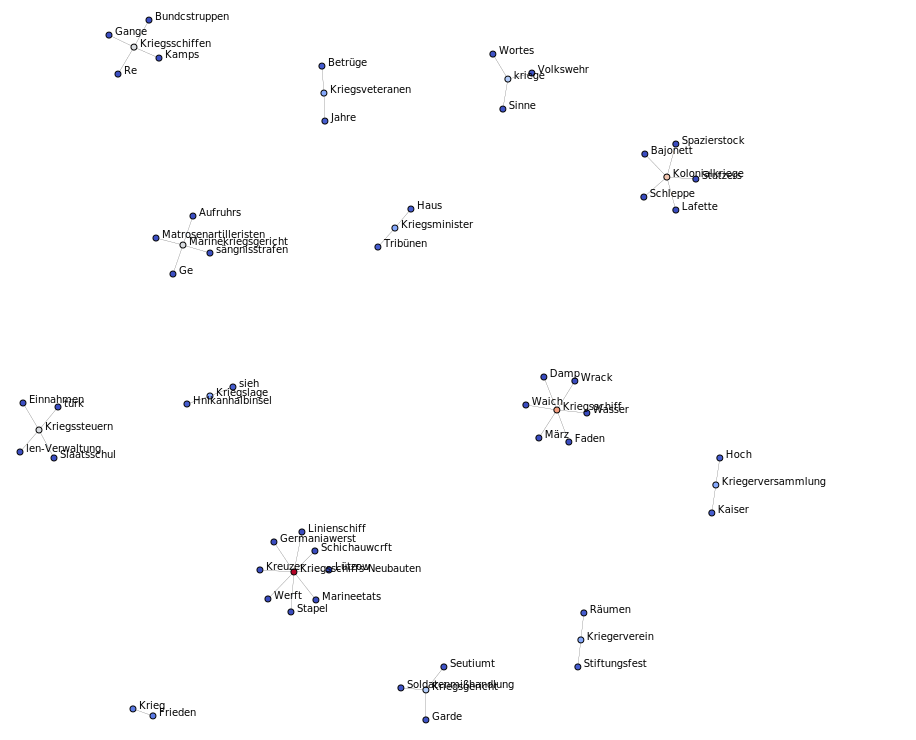

In [92]:
import networkx as nx
n_data=get_network_data(new_nouns).head(50)
G_hamburger = nx.from_pandas_edgelist(n_data)
draw_graph (G_hamburger, edge_width=0.2, node_size=3, show_names=True)

So, what we have done so far: 

1. we filtered out newspaper articles from the first four months of 1914, in which the word "krieg" appears. 
2. we filtered out articles from hamburger fremdenblatt, because it was the most present newspaper in this time. 
3. we filtered out single sentences from these articles containing the word "krieg", with the question in mind: how has hamburger fremdenblatt reported about war in the first four months of 1914?
4. we created a list of nouns or other words containing "krieg" from these sentences. 
5. we converted this list into network data.
6. we visualized 50 rows of the network data. 